In [27]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from ydata_profiling import ProfileReport

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/industrial-safety-and-health-analytics-database/Accidents_Storyline_example.png
/kaggle/input/industrial-safety-and-health-analytics-database/IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv
/kaggle/input/industrial-safety-and-health-analytics-database/IHMStefanini_industrial_safety_and_health_database.csv


In [2]:
df = pd.read_csv("/kaggle/input/industrial-safety-and-health-analytics-database/IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv")

df.head(20)

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...
5,5,2016-01-12 00:00:00,Country_02,Local_05,Metals,I,III,Male,Third Party (Remote),Pressurized Systems,During the unloading operation of the ustulado...
6,6,2016-01-16 00:00:00,Country_02,Local_05,Metals,I,III,Male,Employee,Fall prevention (same level),The collaborator reports that he was on street...
7,7,2016-01-17 00:00:00,Country_01,Local_04,Mining,I,III,Male,Third Party,Pressed,"At approximately 04:50 p.m., when the mechanic..."
8,8,2016-01-19 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Third Party (Remote),Others,Employee was sitting in the resting area at le...
9,9,2016-01-26 00:00:00,Country_01,Local_06,Metals,I,II,Male,Third Party,Chemical substances,At the moment the forklift operator went to ma...


# Data Profile

In [30]:
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in the dataset\n\n")

print(f"Columns in the dataset:")
for column in df.columns:
    print(column)
    
print("\n\n")

print("Brief information about the dataset:\n", 
      df.info())

There are 425 rows and 11 columns in the dataset


Columns in the dataset:
Unnamed: 0
Data
Countries
Local
Industry Sector
Accident Level
Potential Accident Level
Genre
Employee or Third Party
Critical Risk
Description



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                425 non-null    int64 
 1   Data                      425 non-null    object
 2   Countries                 425 non-null    object
 3   Local                     425 non-null    object
 4   Industry Sector           425 non-null    object
 5   Accident Level            425 non-null    object
 6   Potential Accident Level  425 non-null    object
 7   Genre                     425 non-null    object
 8   Employee or Third Party   425 non-null    object
 9   Critical Risk             425 non-null    object
 10  Description         

In [5]:
# extracting the data summary
df.describe()

,Unnamed: 0
count,425.000000
mean,224.084706
std,125.526786
min,0.000000
25%,118.000000
50%,226.000000
75%,332.000000
max,438.000000


In [10]:
# drop the unnames column, rename the data column and also change its data type

df.rename(columns={"Genre": "Gender", "Data": "Date"}, inplace=True)
df['Date']= pd.to_datetime(df['Date']) 

df.drop(labels='Unnamed: 0',axis=1,inplace=True)

# extracting the first row of the dataset to confirm changes
df.head(1)

,Date,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee or Third Party,Critical Risk,Description
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...


# Data Visualisations

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

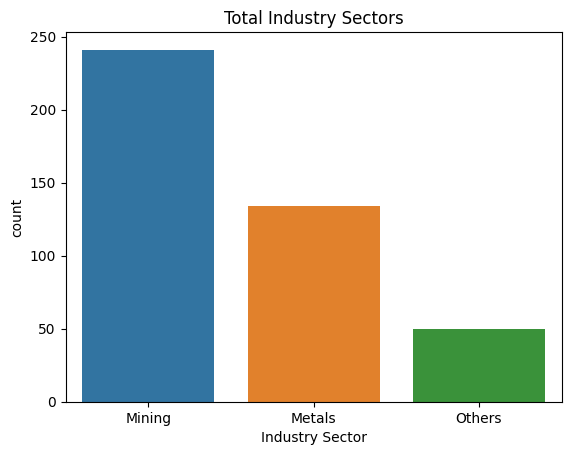

In [13]:
# count categories
sns.countplot(x='Industry Sector', data=df)
plt.title('Total Industry Sectors')
plt.show()


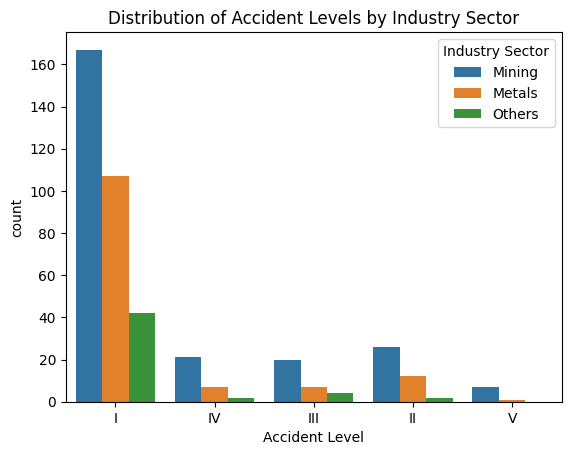

In [14]:
# Distribution of categories
sns.countplot(x='Accident Level', hue='Industry Sector', data=df)
plt.title('Distribution of Accident Levels by Industry Sector')
plt.show()

In [18]:
df.info()

df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      425 non-null    datetime64[ns]
 1   Countries                 425 non-null    object        
 2   Local                     425 non-null    object        
 3   Industry Sector           425 non-null    object        
 4   Accident Level            425 non-null    object        
 5   Potential Accident Level  425 non-null    object        
 6   Gender                    425 non-null    object        
 7   Employee or Third Party   425 non-null    object        
 8   Critical Risk             425 non-null    object        
 9   Description               425 non-null    object        
dtypes: datetime64[ns](1), object(9)
memory usage: 33.3+ KB


,Date,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee or Third Party,Critical Risk,Description
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...
5,2016-01-12,Country_02,Local_05,Metals,I,III,Male,Third Party (Remote),Pressurized Systems,During the unloading operation of the ustulado...
6,2016-01-16,Country_02,Local_05,Metals,I,III,Male,Employee,Fall prevention (same level),The collaborator reports that he was on street...
7,2016-01-17,Country_01,Local_04,Mining,I,III,Male,Third Party,Pressed,"At approximately 04:50 p.m., when the mechanic..."
8,2016-01-19,Country_02,Local_02,Mining,I,IV,Male,Third Party (Remote),Others,Employee was sitting in the resting area at le...
9,2016-01-26,Country_01,Local_06,Metals,I,II,Male,Third Party,Chemical substances,At the moment the forklift operator went to ma...


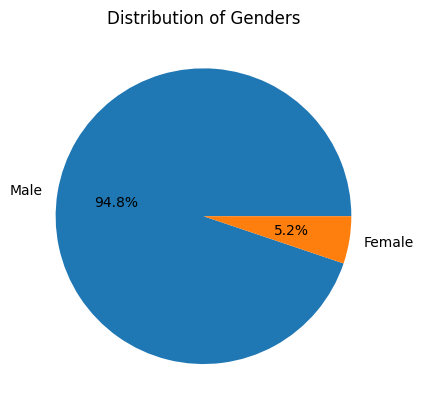

In [17]:
# Proportions of categories
plt.pie(df['Gender'].value_counts(), labels=df['Gender'].unique(), autopct='%1.1f%%')
plt.title('Distribution of Genders')
plt.show()

Text(0.5, 1.0, 'Distribution of Accident Levels by Gender')

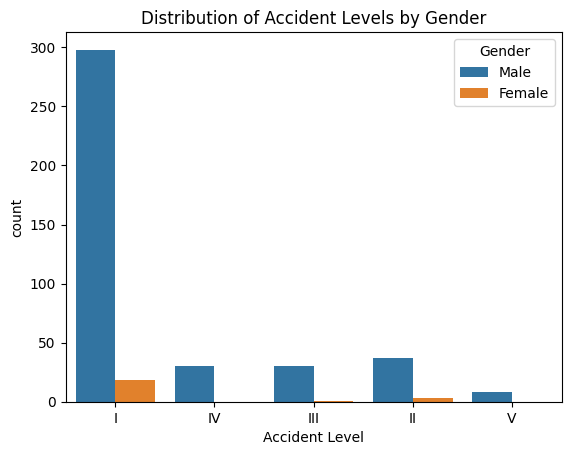

In [22]:
# Distribution of categories
sns.countplot(x='Accident Level', hue='Gender', data=df)
plt.title('Distribution of Accident Levels by Gender')


# Text Data Analysis

**Text data analysis is an essential technique for extracting valuable insights from unstructured text data. It provides a powerful way to understand, analyze, and gain actionable knowledge from written content.**



**Here's a Markdown version of the text:**

**Word Cloud Visualization**

The code snippet below generates a word cloud visualization, highlighting the most frequently occurring words in the `Description` column of a DataFrame. The process involves:

1. **Importing the `wordcloud` library:** This library provides functions for creating word clouds.
2. **Creating a `WordCloud` object:** This object defines the parameters for the word cloud, such as its size and color scheme.
3. **Generating the word cloud:** The `generate` method processes the text data in the `Description` column and creates the word cloud.
4. **Displaying the word cloud:** The `matplotlib.pyplot` library is used to visualize the generated word cloud.


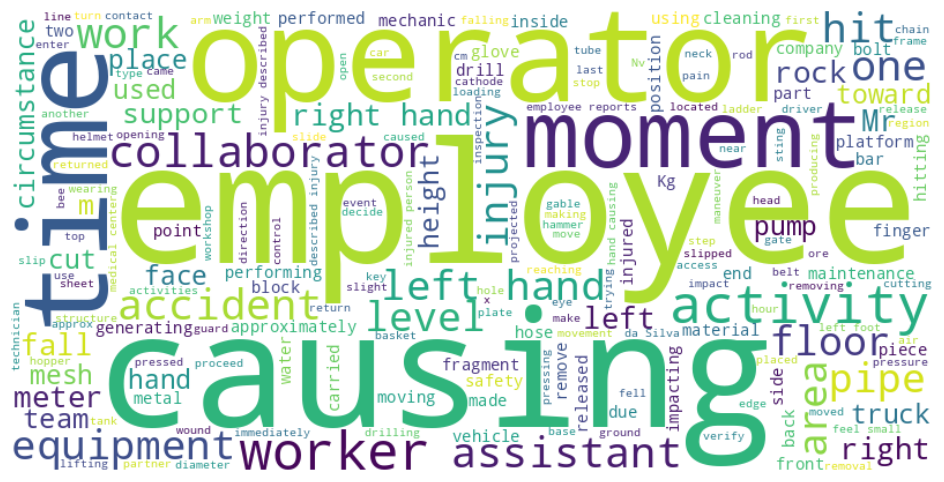

In [24]:
from wordcloud import WordCloud

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white')

# Generate the word cloud
wordcloud.generate(' '.join(df['Description']))

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Analyzing Text with N-grams

**N-grams** are sequences of words or tokens that occur together frequently in a text. By analyzing n-grams, you can identify common phrases, patterns, and relationships within the text.

**This code snippet demonstrates how to extract bigrams (2-word sequences) from the `Description` column of a DataFrame:**

1. **Importing Libraries:**
   - `gensim.models.Phrases`: A library for identifying common n-grams in text data.
   - `collections.Counter`: A class for counting the occurrences of elements in a sequence.

2. **Creating a Phrases Model:**
   - `bigram_model = Phrases(data['Description'].tolist())`: Creates a `Phrases` model that will identify common bigrams in the text data contained in the `Description` column.

3. **Applying the Model:**
   - `bigram_data = bigram_model[data['Description'].tolist()]`: Applies the `bigram_model` to the `Description` column, generating a list of bigrams extracted from the text.

4. **Counting Bigrams:**
   - `bigram_counts = Counter(bigram_data)`: Counts the occurrences of each bigram in the `bigram_data` list.

5. **Printing Results:**
   - `print(bigram_counts.most_common(10))`: Prints the 10 most common bigrams and their corresponding frequencies.

By running this code, you'll obtain a list of the most frequent bigrams found in the `Description` column, providing insights into the common phrases and patterns used in the text. This can be valuable for tasks like topic modeling, text classification, or understanding the language and style of the text.


In [ ]:
from gensim.models import Phrases
from collections import Counter

# Create a Phrases model to identify common bigrams
bigram_model = Phrases(data['Description'].tolist())

# Apply the bigram model to the data
bigram_data = bigram_model[data['Description'].tolist()]

# Count the occurrences of bigrams
bigram_counts = Counter(bigram_data)

# Print the most common bigrams
print(bigram_counts.most_common(10))